# Deep Learning Method: LSTM Method

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [19]:
# load the dataset
df = pd.read_csv("coal-25082020.csv")
df=df.drop(['Copper','Date','Gold','Silver','IronOre','Coal.Australia','CrudeOil','Fuel.Index','NaturalGas','Coal.Producer.Index','CrudeOil.Index','Metal.Index','NonFuel.Index','Commodity.Index','CLI','CCI','BCI'], axis=1)
df.head()

,Coal.SA
0,31.0
1,31.0
2,31.0
3,31.0
4,31.0


In [20]:
dataset = df.values

In [21]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [22]:
len(dataset)

343

In [45]:
train_size = int(len(dataset) * 0.84)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

288 55


In [46]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, t=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-t-1):
        a = dataset[i:(i+t), 0]
        dataX.append(a)
        dataY.append(dataset[i + t, 0])
    return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t and Y=t+1
t = 1
trainX, trainY = create_dataset(train, t)
testX, testY = create_dataset(test, t)

In [47]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [48]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, t)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 4)                 96        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=1)

Epoch 1/30
286/286 [==============================] - 2s 7ms/step - loss: 0.0677
Epoch 2/30
286/286 [==============================] - 2s 6ms/step - loss: 0.0431
Epoch 3/30
286/286 [==============================] - 2s 6ms/step - loss: 0.0370
Epoch 4/30
286/286 [==============================] - 2s 6ms/step - loss: 0.0319
Epoch 5/30
286/286 [==============================] - 2s 6ms/step - loss: 0.0264
Epoch 6/30
286/286 [==============================] - 2s 8ms/step - loss: 0.0201
Epoch 7/30
286/286 [==============================] - 2s 6ms/step - loss: 0.0122
Epoch 8/30
286/286 [==============================] - 2s 5ms/step - loss: 0.0045
Epoch 9/30
286/286 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 10/30
286/286 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 11/30
286/286 [==============================] - 2s 6ms/step - loss: 0.0011
Epoch 12/30
286/286 [==============================] - 2s 5ms/step - loss: 0.0011
Epoch 13/30
286/286 [====

In [ ]:
#plot train and validation loss curves 

In [50]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions to get actual values
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.66 RMSE
Test Score: 5.41 RMSE


In [51]:
import sklearn.metrics as sm
print("R^2 score =", round(sm.r2_score(testY[0], testPredict), 2))
# if R^2 is nearly 1, it's the best case.

R^2 score = 0.88


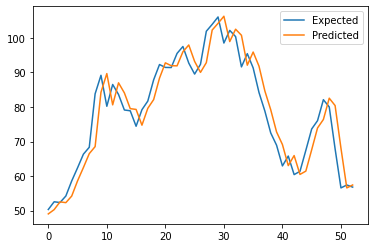

In [52]:
# plot expected vs predicted
from matplotlib import pyplot
pyplot.plot(testY[0], label='Expected')
pyplot.plot(testPredict, label='Predicted')
pyplot.legend()
pyplot.show()